### Task1: Разведочный анализ

#### Импорт необходимых библиотек

In [252]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#### Набор данных

Был выбран датасет с информацией об автомобилях, которые продавались в Польше. Набор содержит данные о марке, модели, поколении, годе выпуска, пробеге, местоположении и цене машины, а также о типе и об объеме двигателя.

In [253]:
df = pd.read_csv("Car_Prices_Poland_Kaggle.csv")

df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


Размерность датасета:

In [254]:
df.shape

(117927, 11)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


#### Чистка данных

In [256]:
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

В датасете отсутствуют данные об имени поколения (generation_name) у 30085 автомобилей. Удалим этот столбец, а также удалим столбец "Unnamed: 0", так как в нем содержится информация только о номере строки.

In [257]:
df.drop(columns=["generation_name", "Unnamed: 0"], inplace=True)

In [258]:
df.describe().round(3)

,year,mileage,vol_engine,price
count,117927.000,117927.000,117927.000,117927.000
mean,2012.925,140976.786,1812.058,70299.885
std,5.690,92369.357,643.613,84824.578
min,1945.000,0.000,0.000,500.000
25%,2009.000,67000.000,1461.000,21000.000
50%,2013.000,146269.000,1796.000,41900.000
75%,2018.000,203000.000,1995.000,83600.000
max,2022.000,2800000.000,7600.000,2399900.000


Необходимо проверить данные на дубликаты, в случае их наличия удалим лишние строки.

In [259]:
old_len = len(df)
df.drop_duplicates(inplace=True)
len_dropped_rows = old_len - len(df)
if len_dropped_rows > 0:
    print(f'Дубликатов удалено: {len_dropped_rows}')
else:
    print("Дубликаты отсутствуют")

Дубликатов удалено: 6761


#### Распределение данных

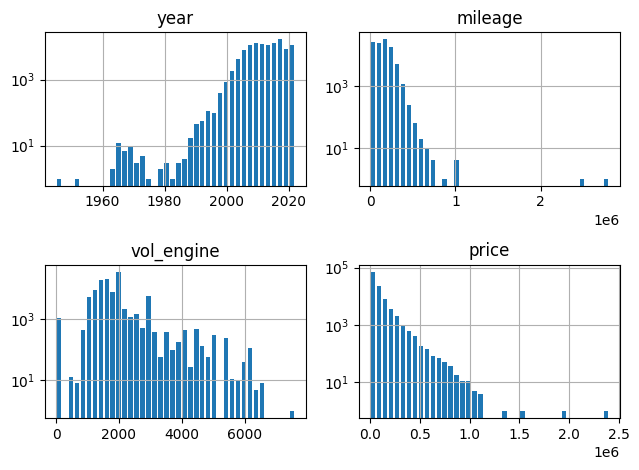

In [260]:
df.hist(column=["year", "mileage", "vol_engine", "price"], bins=40, log=True, rwidth=0.75)
plt.tight_layout()

Данные графики показывают количество машин с определенными атрибутами (год, пробег, объем двигателя, цена) в выбранном датасете.

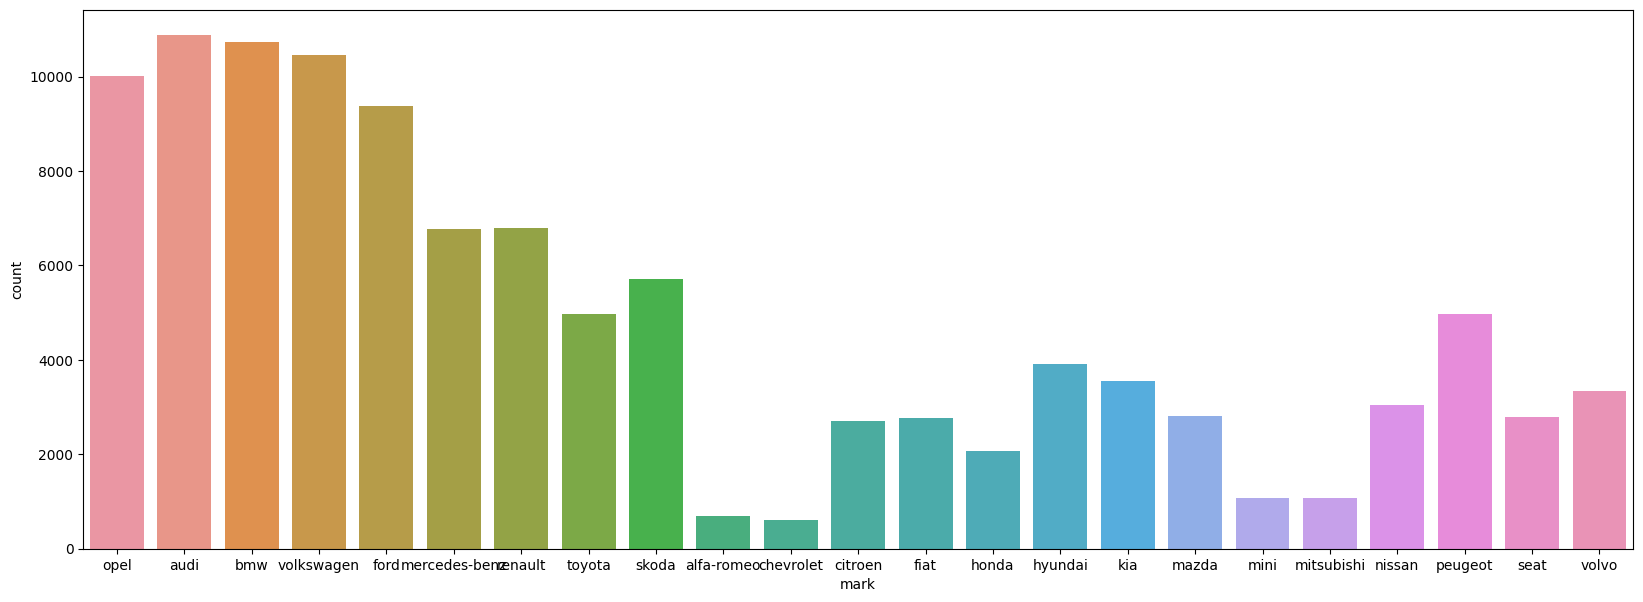

In [261]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df["mark"])
plt.show()

По графику зависимости количества машин от марки можно сделать вывод, что наиболее популярными являются opel, audi, bmw, volkswagen и ford, каждая из перечисленных моделей занимает порядка 10% от общего количества данных.

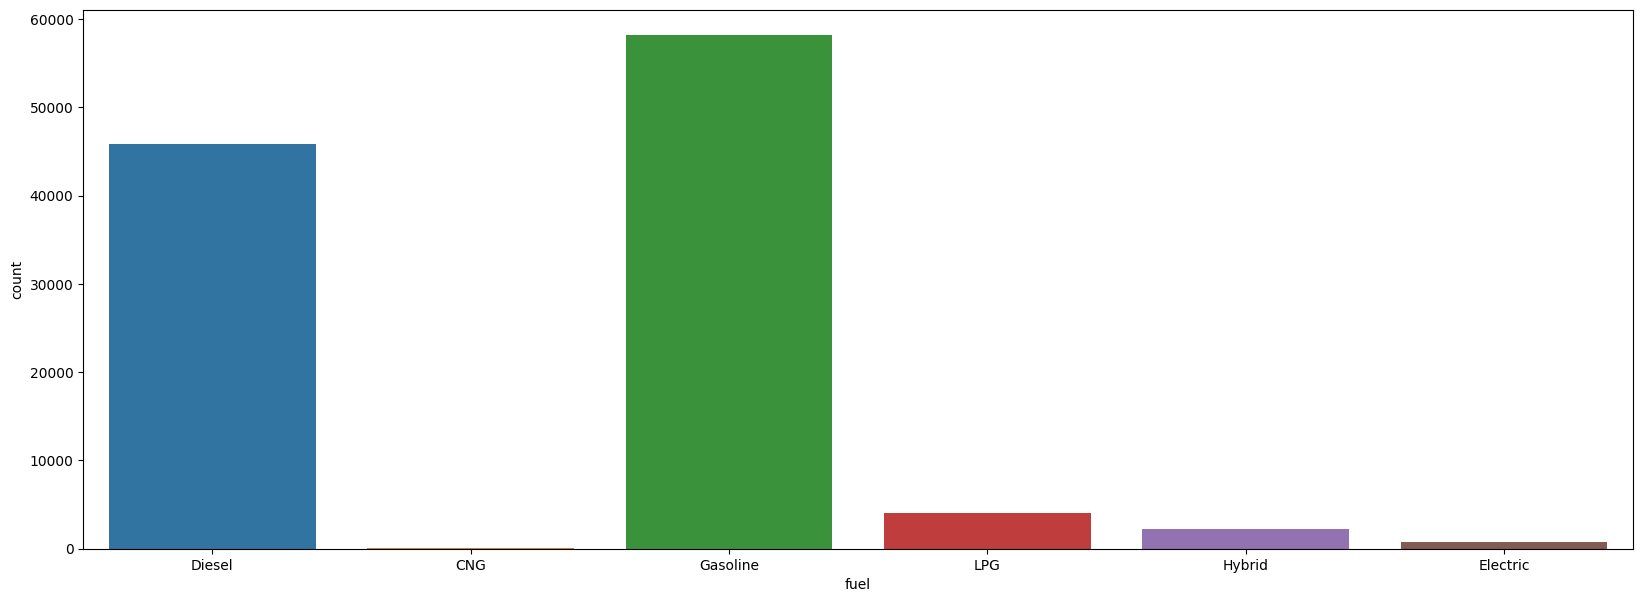

In [262]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df["fuel"])
plt.show()

Наибольшее количество машин из датасета работает на бензине и дизеле.

#### Корреляция

Для анализа зависимостей необходимо преобразовать строковые атрибуты в числа.

In [263]:
LE = LabelEncoder()
df["mark"] = LE.fit_transform(df["mark"])
df["model"] = LE.fit_transform(df["model"])
df["fuel"] = LE.fit_transform(df["fuel"])
df["city"] = LE.fit_transform(df["city"])
df["province"] = LE.fit_transform(df["province"])

print(df.head())

   mark  model  year  mileage  vol_engine  fuel  city  province  price
0    15     89  2015   139568        1248     1  1161         6  35900
1    15     89  2018    31991        1499     1  1365        21  78501
2    15     89  2015   278437        1598     1   300        11  27000
3    15     89  2016    47600        1248     1  1510        11  30800
4    15     89  2014   103000        1400     0  3606        21  35900


Наиболее интересно научиться предсказывать цену автомобилей по остальным признакам. По таблице представленной ниже можно увидеть, что на цену автомобиля наиболее сильно влияют год выпуска, пробег и объем двигателя. При увеличении года выпуска и объема двигателя цена возрастает, а при увеличении пробега цена падает, исходя из знака коэффициента.

<Axes: >

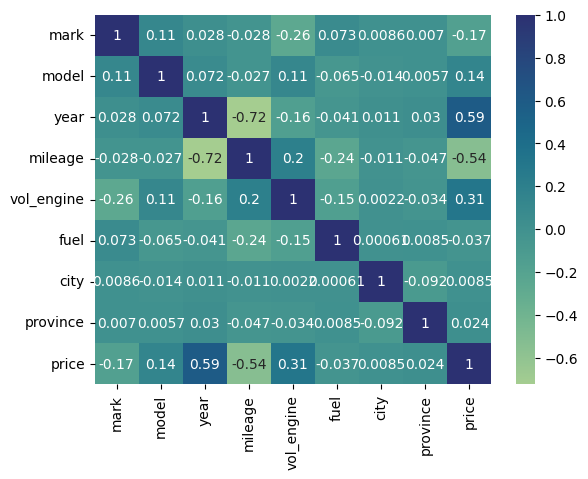

In [264]:
sns.heatmap(df.corr(), annot=True, cmap="crest")